In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%cd "/content/drive/MyDrive/Cursos/TC3002 Aplicaciones Avanzadas de Computacion/Machine Learning/Data Augmentation"
!ls

/content/drive/MyDrive/Cursos/TC3002 Aplicaciones Avanzadas de Computacion/Machine Learning/Data Augmentation
 augmented  'Data augmentation.ipynb'   images


# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
						#	width_shift_range = 0.2,
						#	height_shift_range = 0.2,
						#	shear_range = 0.3,
						#	zoom_range = 0.3,
							horizontal_flip = True,)

para ello tenemos que asignar una fuente base de imágenes a modificar, en este caso tomamos las de el directorio de train, en este caso solo estamos tomando una imagen y estamos mostrando como se generarían 5 imágenes diferentes:

Found 8 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

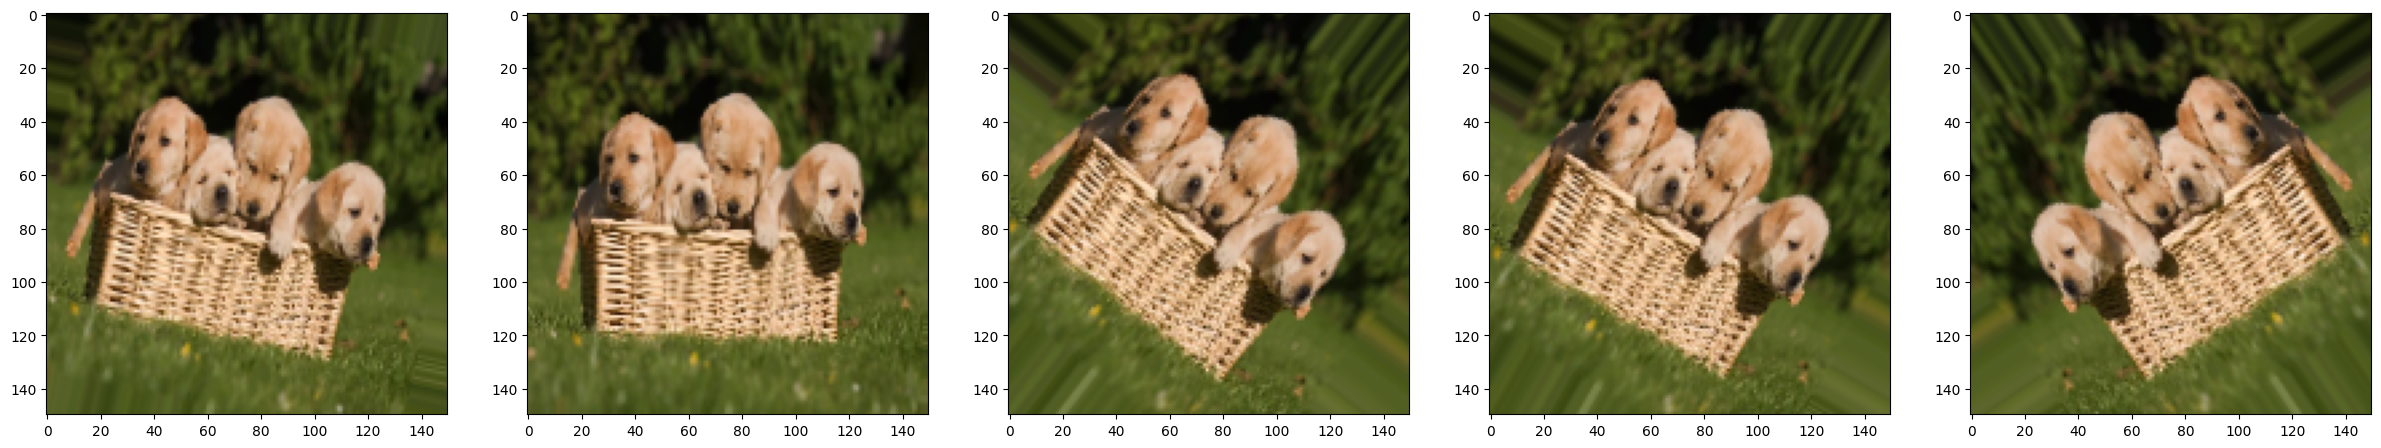

In [21]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 1, #numero de imagenes que se toman en cada iteracion
							class_mode ='binary',
							)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 8 images belonging to 2 classes.


(8, 150, 150, 3)
[1. 0. 1. 1. 1. 0. 0. 0.]


<Figure size 640x480 with 0 Axes>

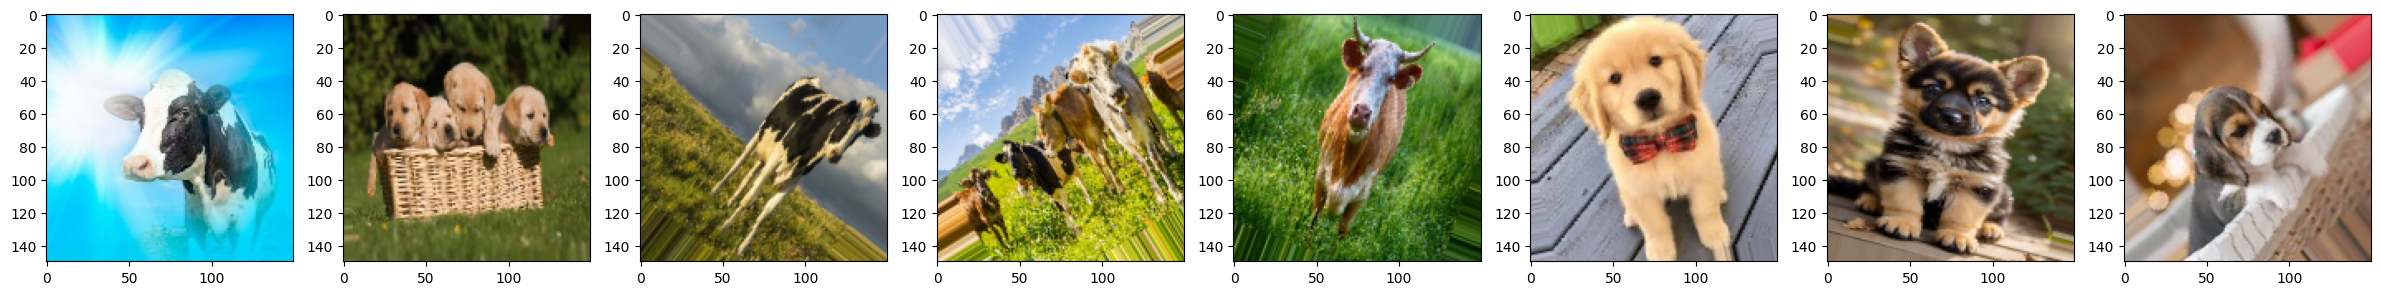

In [27]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])


También podemos configurar la generación de imágenes para que cada una se salve en el disco duro, de esta forma podemos ver posteriormente con qué imágenes entrenó el modelo.

In [23]:
path = "."

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							save_to_dir= path + '/augmented',
              save_prefix='aug',
              save_format='png'
							)

Found 8 images belonging to 2 classes.


Esta es una red neuronal convolutiva:

In [24]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 219040)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    56,074,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,075,033 (213.91 MB)

 Trainable params: 56,075,033 (213.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


c:\TEC\M2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - acc: 0.5000 - loss: 0.7189
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step - acc: 0.5000 - loss: 1.5035
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 0.5000 - loss: 7.1320
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - acc: 0.5000 - loss: 1.0784
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - acc: 0.5000 - loss: 1.0303
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - acc: 0.5000 - loss: 0.9663
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - acc: 0.5000 - loss: 0.9107
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - acc: 0.6250 - loss: 0.6335
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - acc: 0.6250 - loss: 0.5736
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - acc: 0.6250 - loss: 0.6091


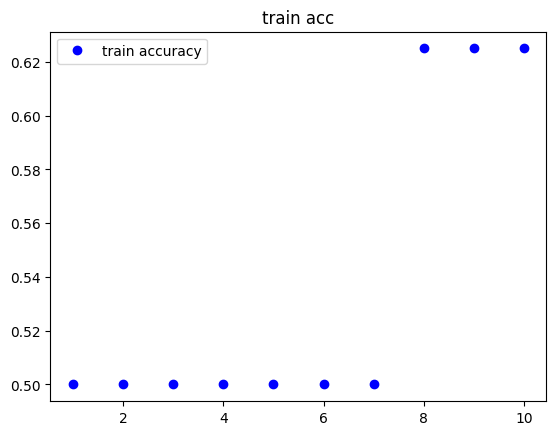

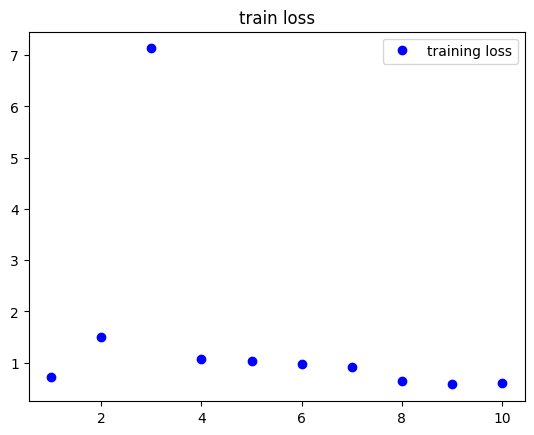

In [25]:
history = model.fit(
						train_generator,
						epochs = 10)


acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [26]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 8 images belonging to 2 classes.


c:\TEC\M2\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6250 - loss: 169.3194  

test acc :
 0.625


C:\Users\Angel Rico\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
